<a href="https://colab.research.google.com/github/Teacher-Heiko/-computer-vision-Lab-1-Exercises-1-8/blob/main/Copy_of_MaxPool_Dropout_BatchNorm0_9928.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np



In [2]:
# # Download and prepare the dataset
# transform = transforms.Compose([
#     transforms.ToTensor(),
# ])

# dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
# dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


In [3]:
from fastai.vision.all import *

path = untar_data(URLs.MNIST)

In [4]:
Path.BASE_PATH = path

def get_dls(bs=512):
    return DataBlock(
        blocks=(ImageBlock(cls=PILImageBW), CategoryBlock),
        get_items=get_image_files,
        splitter=GrandparentSplitter('training','testing'),
        get_y=parent_label,
        batch_tfms=Normalize()
    ).dataloaders(path, bs=bs)

dls = get_dls()

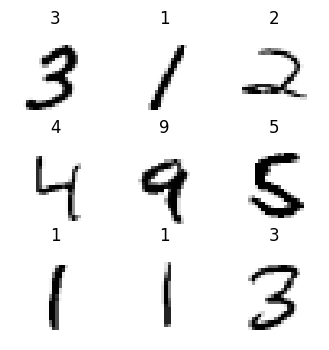

In [5]:
dls.show_batch(max_n=9, figsize=(4,4))

In [6]:
# def simple_cnn():
#    return nn.Sequential(
#       nn.Conv2d(1, 4, kernel_size=(3,3), stride=1, padding=1), # Output Size: [4, 28, 28] (4 channels, 28x28 pixels)
#       nn.ReLU(),

#       nn.Conv2d(4, 8, kernel_size=(3,3), stride=1, padding=1), # [8, 28, 28] (8 channels, 28x28 pixels)
#       nn.ReLU(),

#       nn.Flatten(),
#       nn.Linear(8*28*28, 64),
#       nn.Linear(64, 10)
#    )

In [7]:
# simple_cnn()

In [8]:
# def fit(epochs=1):
#     learn = Learner(dls, simple_cnn(), loss_func=F.cross_entropy,
#                     metrics=accuracy, cbs=ActivationStats(with_hist=True))
#     print(learn.summary())
#     learn.fit(epochs, 0.6)
#     return learn

In [9]:
#  learn = Learner(dls, simple_cnn(), loss_func=F.cross_entropy,
                    # metrics=accuracy, cbs=ActivationStats(with_hist=True))

In [10]:
# learn.lr_find()

In [11]:
# learn = fit()

<figure>
<!-- <img src="./images/2-convmodel-2.png" width="250" alt="Diagram of a convolutional model."> -->
<img src="https://storage.googleapis.com/kaggle-media/learn/images/Vko6nCK.png" width="250" alt="Diagram of a convolutional model.">
</figure>

In [12]:
# def simple_cnn_max():
#    return nn.Sequential(
#       nn.Conv2d(1, 32, kernel_size=(3,3), stride=1, padding=1), # Output Size: [32, 28, 28]
#       nn.ReLU(),
#       nn.MaxPool2d(2),                                         # Output Size: [32, 14, 14]

#       nn.Conv2d(32, 64, kernel_size=(3,3), stride=1, padding=1), # [64, 14, 14]
#       nn.ReLU(),
#       nn.MaxPool2d(2),                                          # [64, 7, 7]

#       nn.Conv2d(64, 128, kernel_size=(3,3), stride=1, padding=1), # [128, 7, 7]
#       nn.ReLU(),
#       nn.Conv2d(128, 512, kernel_size=(3,3), stride=1, padding=1), # [512, 7, 7]
#       nn.ReLU(),
#       nn.Conv2d(512, 1024, kernel_size=(3,3), stride=1, padding=1), # [1024, 7, 7]
#       nn.ReLU(),
#       nn.MaxPool2d(2),                                          # [1024, 3, 3]


#       nn.Flatten(),
#       nn.Linear(1024 * 3 * 3, 512),   # Input size should match the number of flattened features
#       nn.Dropout(0.2),
#       nn.Linear(512, 64),
#       nn.Linear(64, 10)

#    )

# simple_cnn_max()

In [13]:
# def fit_max(epochs=1, lr=0.06):
#     learner = Learner(dls, simple_cnn_max(), loss_func=F.cross_entropy,
#                     metrics=accuracy, cbs=ActivationStats(with_hist=True))
#     learner.fit_one_cycle(epochs, lr)
#     return learner

In [14]:
# learn_max = fit_max()

In [15]:
# learn_max.activation_stats.plot_layer_stats(-1)

In [33]:

def simple_cnn_batchnorm():
    return nn.Sequential(
    nn.Conv2d(1, 32, kernel_size=(3, 3), stride=2, padding=1),
    nn.ReLU(),
    nn.BatchNorm2d(32),

    nn.Conv2d(32, 64, kernel_size=(3, 3), stride=2, padding=1),
    nn.ReLU(),
    nn.BatchNorm2d(64),

    nn.MaxPool2d(2),

    nn.Conv2d(64, 128, kernel_size=(3, 3), stride=2, padding=1),
    nn.ReLU(),
    nn.BatchNorm2d(128),

    nn.Conv2d(128, 256, kernel_size=(3, 3), stride=2, padding=1),
    nn.ReLU(),
    nn.BatchNorm2d(256),

    # nn.MaxPool2d(2),

    nn.Flatten(),

    nn.Linear(256 * 1 * 1, 128),
    nn.ReLU(),
    nn.BatchNorm1d(128),
    nn.Dropout(0.3),

    nn.Linear(128, 64),
    nn.ReLU(),
    nn.BatchNorm1d(64),
    nn.Dropout(0.3),

    nn.Linear(64, 10)
)

# simple_cnn_batchnorm()

In [34]:
learner = Learner(dls, simple_cnn_batchnorm(), loss_func=F.cross_entropy,
                    metrics=accuracy, cbs=ActivationStats(with_hist=True))

In [35]:
learner.summary()


Sequential (Input shape: 64 x 1 x 28 x 28)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 32 x 14 x 14   
Conv2d                                    320        True      
ReLU                                                           
BatchNorm2d                               64         True      
____________________________________________________________________________
                     64 x 64 x 7 x 7     
Conv2d                                    18496      True      
ReLU                                                           
BatchNorm2d                               128        True      
____________________________________________________________________________
                     64 x 64 x 3 x 3     
MaxPool2d                                                      
____________________________________________________________________________
                     64 x 128 x 2 x 2    
Conv2d                                    7385

In [36]:
learner.model

Sequential(
  (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (1): ReLU()
  (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (4): ReLU()
  (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (8): ReLU()
  (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (11): ReLU()
  (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (13): Flatten(start_dim=1, end_dim=-1)
  (14): Linear(in_features=256, out_features=128, bias=True)
  (15): ReLU()
  (16): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=Tru

In [ ]:
learner.fit_one_cycle(n_epoch=30)

epoch,train_loss,valid_loss,accuracy,time


In [ ]:
learner.activation_stats.plot_layer_stats(-2)